<a href="https://colab.research.google.com/github/Sakshi-shaw/ACM_Winter_School_2023_Hands_on/blob/main/Lab3_MedMNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visualize Neural Network**

0.001 linear 1.2

0.001 sigmoid 1.2

0.01 sigmoid 1.2

0.001 relu 1.2

0.001 tanh 1.4 1500 epach

0.03 tanh 4 15000 epoch



Install required packages

In [ ]:
!pip install medmnist
!pip install Pillow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tqdm import tqdm
import numpy as np

import medmnist
from medmnist import INFO, Evaluator

In [ ]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.2.3 @ https://github.com/MedMNIST/MedMNIST/


In [ ]:
# import dataset_without_pytorch

# from dataset_without_pytorch import get_loader

 **Parameters**

In [ ]:
epoch = 2
learning_rate = 0.001
batch_size = 32
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_used = tf.keras.losses.CategoricalCrossentropy()

**Load Dataset**

In [ ]:
from medmnist import DermaMNIST

First, we read the data, preprocess them and encapsulate them into dataloader form.

Training Set

In [ ]:
# load the data
train_dataset = DermaMNIST(split='train', download=True)


print(train_dataset)

100%|██████████| 19725078/19725078 [00:20<00:00, 943127.61it/s] 


Dataset DermaMNIST (dermamnist)
    Number of datapoints: 7007
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0


In [ ]:
print(len(train_dataset))
print(train_dataset[0])
print(train_dataset[0][0])
print(train_dataset[0][1])

7007
(<PIL.Image.Image image mode=RGB size=28x28 at 0x784DDDB8A230>, array([0]))
<PIL.Image.Image image mode=RGB size=28x28 at 0x784D411CED40>
[0]


In [ ]:
def montage(self, length=20, replace=False, save_folder=None):
  from medmnist.utils import montage2d

  n_sel = length * length
  sel = np.random.choice(self.__len__(), size = n_sel, replace=replace)

  montage_img = montage2d(imgs = self.imgs,n_channels=self.info['n_channels'], sel=sel)

  if save_folder is not None:
    if not os.path.exists(save_folder):
      os.makedirs(save_folder)
    montage_img.save(os.path.join(save_folder,f"{self.flage}_{self.split}_montage.jpg"))

  return montage_img

In [ ]:
train_dataset.montage(length=1)

/usr/local/lib/python3.10/dist-packages/medmnist/utils.py:31: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


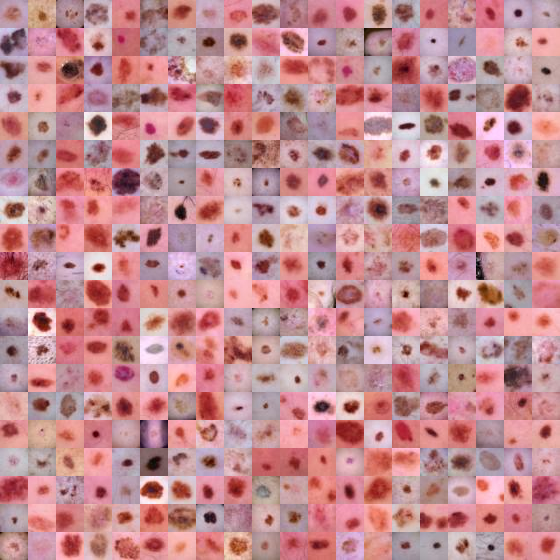

In [ ]:
train_dataset.montage(length=20)

In [ ]:
x,y = train_dataset[0]

print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


In [ ]:
print(len(train_dataset))
class_count = [0,0,0,0,0,0,0]
for i in range (0,len(train_dataset)):
  x,y = train_dataset[i]
  class_count[y[0]]+=1
print(class_count)

7007
[228, 359, 769, 80, 779, 4693, 99]


In [ ]:
from PIL import Image

im = np.asarray(train_dataset[0][0])
print(im.shape)
img = Image.fromarray(im)
img

(28, 28, 3)


In [ ]:
no_of_class = 7
def read_data(data):
  x,y = data[0]
  x = np.array(x)
  data_x_new = np.zeros((len(data),x.shape[0],x.shape[1],x.shape[2]),dtype=float)
  data_y_new = np.zeros((len(data),no_of_class),dtype=float)
  for i in range(0,len(data)):
    x,y = data[i]
    x_new = np.asarray(x)
    y_new = np.zeros(no_of_class,dtype=float)
    y_new[y[0]] = 1
    data_x_new[i]=x_new
    data_y_new[i]=y_new
  return data_x_new,data_y_new


In [ ]:
train_x, train_y = read_data(train_dataset)
print(train_x.shape,train_y.shape)

(7007, 28, 28, 3) (7007, 7)


In [ ]:
print(train_x[0])
print(train_y[0])

[[[158. 111. 117.]
  [161. 116. 121.]
  [164. 121. 130.]
  ...
  [189. 160. 164.]
  [187. 158. 160.]
  [186. 157. 159.]]

 [[160. 113. 119.]
  [165. 120. 125.]
  [170. 129. 137.]
  ...
  [191. 162. 166.]
  [189. 160. 162.]
  [188. 159. 161.]]

 [[164. 119. 124.]
  [170. 128. 132.]
  [177. 137. 145.]
  ...
  [191. 162. 166.]
  [188. 162. 165.]
  [187. 161. 164.]]

 ...

 [[172. 142. 150.]
  [176. 147. 152.]
  [182. 150. 155.]
  ...
  [195. 167. 164.]
  [181. 153. 150.]
  [171. 143. 140.]]

 [[176. 147. 152.]
  [176. 147. 152.]
  [180. 148. 153.]
  ...
  [188. 160. 157.]
  [178. 150. 147.]
  [171. 143. 140.]]

 [[175. 146. 151.]
  [173. 144. 149.]
  [174. 142. 147.]
  ...
  [180. 152. 149.]
  [175. 147. 144.]
  [173. 145. 142.]]]
[1. 0. 0. 0. 0. 0. 0.]


Validation set

In [ ]:
# load the data
val_dataset =  DermaMNIST(split='val', download=True)

print(val_dataset)

Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Dataset DermaMNIST (dermamnist)
    Number of datapoints: 1003
    Root location: /root/.medmnist
    Split: val
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0


In [ ]:
x, y = val_dataset[0]

print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


In [ ]:
print(len(val_dataset))
class_count = [0,0,0,0,0,0,0,0]
for i in range(0,len(val_dataset)):
  x,y = val_dataset[i]

  class_count[y[0]]+=1
print(class_count)

1003
[33, 52, 110, 12, 111, 671, 14, 0]


In [ ]:
from PIL import Image

im = np.asarray(train_dataset[0][0])
print(im.shape)
img = Image.fromarray(im)
img

(28, 28, 3)


In [ ]:
val_x, val_y = read_data(val_dataset)
print(val_x.shape,val_y.shape)

(1003, 28, 28, 3) (1003, 7)


Test Set

In [ ]:
# load the data
test_dataset = DermaMNIST(split='test', download=True)

print(test_dataset)

Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Dataset DermaMNIST (dermamnist)
    Number of datapoints: 2005
    Root location: /root/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0


In [ ]:
x, y = test_dataset[0]

print(np.array(x).shape, y.shape)
print(y)

(28, 28, 3) (1,)
[5]


In [ ]:
print(len(test_dataset))
class_count = [0,0,0,0,0,0,0,0,0]
for i in range(0,len(test_dataset)):
  x,y = test_dataset[i]
  # print(type(y))
  # print(y)
  # print(len(y))
  class_count[y[0]]+=1
print(class_count)

2005
[66, 103, 220, 23, 223, 1341, 29, 0, 0]


In [ ]:
test_x, test_y = read_data(test_dataset)
print(test_x.shape,test_y.shape)

(2005, 28, 28, 3) (2005, 7)


Neural Networks

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
input_layers = layers.Input(shape=(28,28,3,))
y = layers.Flatten()(input_layers)
y = layers.Dense(1024,activation=tf.nn.relu)(y)
y = layers.Dense(512,activation=tf.nn.relu)(y)
y = layers.Dense(256,activation=tf.nn.relu)(y)
y = layers.Dense(128,activation=tf.nn.relu)(y)
y = layers.Dense(64,activation=tf.nn.relu)(y)
y = layers.Dense(32,activation=tf.nn.relu)(y)
output_layers = layers.Dense(7,activation='softmax')(y)
nn_model = tf.keras.Model(inputs = input_layers, outputs = output_layers)


In [ ]:
nn_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 2352)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)              2409472   
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256

In [ ]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [ ]:
nn_history = nn_model.fit(train_x,train_y,epochs=epoch,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))


Epoch 1/2
219/219 [==============================] - 15s 63ms/step - loss: 30.7345 - accuracy: 0.5099 - val_loss: 1.7400 - val_accuracy: 0.6680
Epoch 2/2
219/219 [==============================] - 11s 52ms/step - loss: 1.2878 - accuracy: 0.6211 - val_loss: 1.0903 - val_accuracy: 0.6062


In [ ]:
score = nn_model.evaluate(test_x, test_y, verbose = 0)
print(score)

[1.0854997634887695, 0.6209476590156555]


**VGG**

In [ ]:
from tensorflow.keras import models, layers

In [ ]:


vgg_model = tf.keras.Sequential()
vgg_model.add(layers.Input((28,28,3)))
vgg_model.add(layers.ZeroPadding2D((2,2)))
vgg_model.add(layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(4096,activation='relu'))
vgg_model.add(layers.Dense(256,activation='relu'))
vgg_model.add(layers.Dense(7,activation='softmax'))

In [ ]:
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [ ]:
vgg_history = vgg_model.fit(train_x,train_y,epochs=epoch,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))


Epoch 1/2
219/219 [==============================] - 187s 846ms/step - loss: 1.2281 - accuracy: 0.6615 - val_loss: 1.0042 - val_accuracy: 0.6690
Epoch 2/2
219/219 [==============================] - 179s 817ms/step - loss: 0.9584 - accuracy: 0.6725 - val_loss: 0.9479 - val_accuracy: 0.6690


In [ ]:
score = vgg_model.evaluate(test_x, test_y, verbose = 0)
print(score)

[0.9537088871002197, 0.6688279509544373]


In [ ]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 32, 32, 3)         0         
 ing2D)                                                          
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)      

ResNet


In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import resnet50

In [ ]:
input_layer=layers.Input(shape=(28,28,3))
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=True)
resnet_model.summary()
last_layer = resnet_model.get_layer('avg_pool').output

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 34, 34, 3)            0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 14, 14, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 14, 14, 64)           256       ['conv1_conv[0][0]']          
 on)                    

In [ ]:
flatten=layers.Flatten()(last_layer)
output_layer=layers.Dense(no_of_class,activation='softmax')(flatten)
rs50_model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

In [ ]:
rs50_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 34, 34, 3)            0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 14, 14, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 14, 14, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
rs50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [ ]:
rs50_history = rs50_model.fit(train_x,train_y,epochs=epoch-1,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))


219/219 [==============================] - 507s 2s/step - loss: 1.1783 - accuracy: 0.6696 - val_loss: 2.1322 - val_accuracy: 0.6690


In [ ]:
score = rs50_model.evaluate(test_x, test_y, verbose = 0)
print(score)

[1.4259170293807983, 0.6688279509544373]
